In [1]:
!gdown https://drive.google.com/uc?id=1P2zpxoOATDGhEKULEMbEECh6gLQM4h_h

Downloading...
From: https://drive.google.com/uc?id=1P2zpxoOATDGhEKULEMbEECh6gLQM4h_h
To: /content/Faces.zip
100% 17.7M/17.7M [00:00<00:00, 27.6MB/s]


In [6]:
!echo pwd

pwd


In [18]:
import cv2
import numpy as np
import os

# Path to the main dataset directory
dataset_path = '/content/Characters'

# Create an LBPH face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Initialize lists to hold the training data and labels
faces = []
labels = []

# Method to read the images and labels from the dataset
def get_images_and_labels(dataset_path):
    # List all subdirectories (each representing a different person)
    person_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for person_dir in person_dirs:
        person_path = os.path.join(dataset_path, person_dir)

        # List all images in the person's directory
        image_paths = [os.path.join(person_path, f) for f in os.listdir(person_path)]
        for image_path in image_paths:
            # Read the image in grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # The label is the name of the subdirectory (person's name)
            label = person_dir

            # Append the face and the label to the respective lists
            faces.append(image)
            labels.append(label)

    return faces, labels

# Load the training data
faces, labels = get_images_and_labels(dataset_path)

# Encode labels as integers (required by the recognizer)
label_encoder = {label: idx for idx, label in enumerate(set(labels))}
encoded_labels = np.array([label_encoder[label] for label in labels])

# Train the recognizer with the training data
recognizer.train(faces, encoded_labels)

# Save the trained model to a file
recognizer.save('lbph_trained_model.yml')

Predicted Label: DalaiLama, Confidence: 89.47029710245805


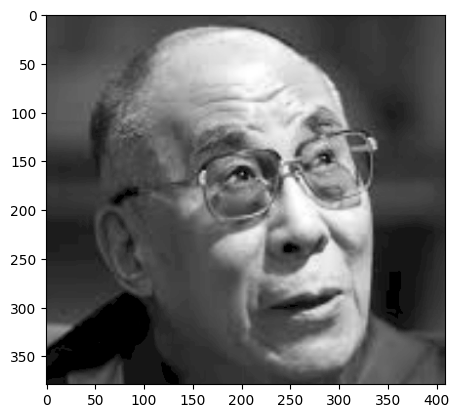

In [20]:

# Load the trained model
recognizer.read('lbph_trained_model.yml')

# Function to predict a face
def predict_face(image_path):
    # Read the image in grayscale
    test_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Predict the label of the image
    encoded_label, confidence = recognizer.predict(test_image)

    # Decode the label back to the original string label
    decoded_label = {v: k for k, v in label_encoder.items()}[encoded_label]

    return test_image,decoded_label, confidence

# Example of using the recognizer to predict a face
test_image_path = 'Dalailama.png'
img,label, confidence = predict_face(test_image_path)
import matplotlib.pyplot as plt
plt.imshow(img,cmap="gray")
print(f'Predicted Label: {label}, Confidence: {confidence}')